# Data Viz Project- Part 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import bqplot
import ipywidgets
from ipywidgets import interact
import matplotlib.dates as mdates

from matplotlib import dates as mpl_dates
from datetime import datetime
import warnings
import pycountry
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading CSV Plots

In [2]:
csv_df = pd.read_csv("C:/Users/rohit/OneDrive/Desktop/Subjects/Fall2020/DataViz/Project/full_data.csv")
csv_df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
56353,2020-11-11,Zimbabwe,49.0,1.0,8610.0,255.0,200.0,9.0,295.0,13.0
56354,2020-11-12,Zimbabwe,57.0,0.0,8667.0,255.0,240.0,7.0,347.0,13.0
56355,2020-11-13,Zimbabwe,29.0,0.0,8696.0,255.0,252.0,7.0,347.0,13.0
56356,2020-11-14,Zimbabwe,69.0,2.0,8765.0,257.0,294.0,7.0,403.0,15.0


### Preprocessing data

In [3]:
death_values= pd.DataFrame(csv_df['total_deaths'].groupby(csv_df['location']).agg('sum')).sort_values(by='total_deaths', ascending=False).reset_index()
death_values.drop(death_values.loc[death_values['location'] == 'World'].index, inplace=True)
cases_values=pd.DataFrame(csv_df['total_cases'].groupby(csv_df['location']).agg('sum')).sort_values(by='total_cases', ascending=False).reset_index()
cases_values.drop(cases_values.loc[cases_values['location'] == 'World'].index, inplace=True)

### Individual Plot: Total Deaths and Total Case in whole world

<BarContainer object of 2 artists>

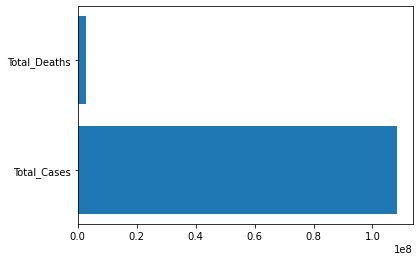

In [4]:
plt.barh(['Total_Cases', 'Total_Deaths'], [csv_df['new_cases'].agg('sum'), csv_df['new_deaths'].agg('sum')] )

### Individual Plot:  Top Countries in terms of COVID-19 Cases

<BarContainer object of 20 artists>

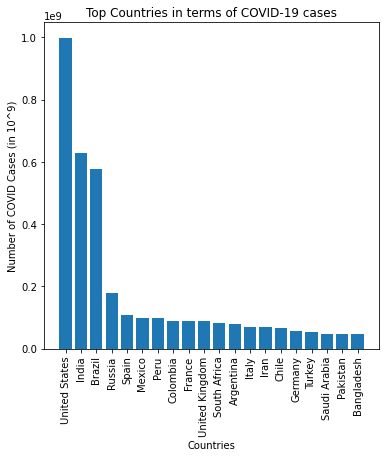

In [5]:
# Plot Top 10 country by Case count
fig, ax1 = plt.subplots(figsize=(6,6))
plt.xticks(rotation=90)
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of COVID Cases (in 10^9)")
ax1.set_title("Top Countries in terms of COVID-19 cases")
ax1.bar(cases_values['location'].head(20), cases_values['total_cases'].head(20))

### Individual Plot: Top Countries in terms of COVID-19 Deaths

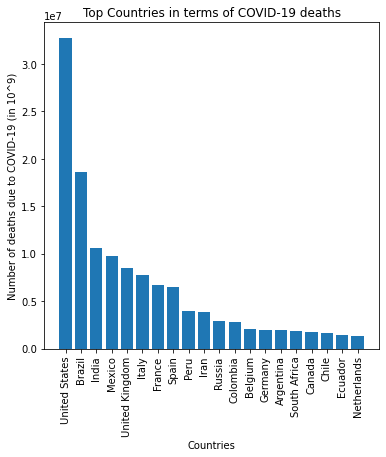

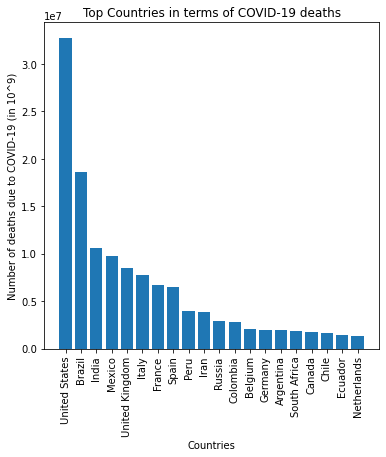

In [6]:
# Plot Top 10 country by Death count
fig, ax2 = plt.subplots(figsize=(6,6))
plt.xticks(rotation=90)
ax2.set_xlabel("Countries")
ax2.set_ylabel("Number of deaths due to COVID-19 (in 10^9)")
ax2.set_title("Top Countries in terms of COVID-19 deaths")
ax2.bar(death_values['location'].head(20), death_values['total_deaths'].head(20))
fig

### Individual Plot: COVID-19 propogation (Death/Cases) for selected country

In [7]:
# Countries vs total_cases timeline
@ipywidgets.interact(country=csv_df['location'].unique())
    
def plot_fuc(country, yAxis= list(['total_cases', 'total_deaths'])):
    fig, ax3 = plt.subplots(figsize=(10,10))
    xAxis = csv_df['date'].loc[csv_df['location'] == country]
    xAxis=pd.to_datetime(xAxis)

    ax3.plot(xAxis, csv_df[yAxis].loc[csv_df['location'] == country].fillna(0))
    ax3.set_xlabel('Date of record')
    ax3.set_ylabel('Count')
    ax3.set_title('COVID-19 propogation (Death/Cases)')
#     plt.xticks()
    ax3.autoscale(enable=True, axis='x', tight=False)
    plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

### Individual Plot: COVID-19 propogation new Death/Cases for selected country

In [8]:
# Countries vs total_cases timeline
@ipywidgets.interact(country=csv_df['location'].unique())
    
def plot_fuc(country, yAxis= list(['new_cases', 'new_deaths'])):
    fig, ax4 = plt.subplots(figsize=(15,10))
    
    
    xAxis = csv_df['date'].loc[csv_df['location'] == country]
    xAxis=pd.to_datetime(xAxis)
    #ax4
    ax4.plot(xAxis, csv_df[yAxis].loc[csv_df['location'] == country].fillna(0))
    axis =list(xAxis)
    ax4.set_xlabel('Date of record')
    ax4.set_ylabel('Count')
    ax4.set_title('COVID-19 propogation new Death/Cases')
    plt.xticks(rotation=90)
    ax4.autoscale(enable=True, axis='x', tight=True)

    plt.show()

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

### Creating Dash board with Grid of 4 rows and 3 columns 

In [9]:
import matplotlib.gridspec as gridspec
@ipywidgets.interact(country=csv_df['location'].unique())
    
def dashboard_function(country, Daily= list(['new_cases', 'new_deaths']), Total= list(['total_cases', 'total_deaths'])):
    
    fig = plt.figure(constrained_layout=True, figsize=(10,10))
    specs = gridspec.GridSpec(ncols=2, nrows=4, figure=fig, wspace=0.2 )
    xAxis = csv_df['date'].loc[csv_df['location'] == country]
    xAxis=pd.to_datetime(xAxis) # converting dates to DataTime
    
    fig.suptitle(' COVID-19 Till November ', fontsize=20)
    ax1 = fig.add_subplot(specs[1, 0]) 
    plt.xticks(rotation=90)

    ax2 = fig.add_subplot(specs[1, 1]) 
    plt.xticks(rotation=90)
    
    ax3 = fig.add_subplot(specs[3, 0])
    plt.xticks(rotation=90)
    
    ax4 = fig.add_subplot(specs[3, 1]) 
    plt.xticks(rotation=90)
    
    ax5 = fig.add_subplot(specs[0, :]) 
    ax6 = fig.add_subplot(specs[2, :]) 
    #ax1
    # Plot Top 10 country by Case count
    plt.xticks(rotation=90)
    ax1.set_xlabel("Countries")
    ax1.set_ylabel("Number of COVID Cases")
    ax1.set_title("Top Countries in terms of COVID-19 cases",loc='right')
    ax1.bar(cases_values['location'].head(20), cases_values['total_cases'].head(20))

    #ax2
    ax2.set_xlabel("Countries")
    ax2.set_ylabel("Number of deaths due to COVID-19")
    ax2.set_title("Top Countries in terms of COVID-19 deaths",loc='right')
    ax2.bar(death_values['location'].head(20), death_values['total_deaths'].head(20))

    #ax3
    ax3.plot(xAxis, csv_df[Daily].loc[csv_df['location'] == country].fillna(0))
    ax3.set_xlabel('Date of record')
    ax3.set_ylabel('Count')
    ax3.set_title('Daily New COVID-19 Deaths and Cases')
    
    #ax4
    ax4.plot(xAxis, csv_df[Total].loc[csv_df['location'] == country].fillna(0))
    ax4.set_xlabel('Date of record')
    ax4.set_ylabel('Count')
    ax4.set_title('Total Count of COVID-19 Deaths/Cases')
    
    #ax5
    ax5.barh(['Total_Cases', 'Total_Deaths'], [csv_df['new_cases'].agg('sum'), csv_df['new_deaths'].agg('sum')] )    
    ax5.set_xlabel('Count')
    ax5.set_title('Total Cases and Deaths Due to Covid')
    
    #ax6
    ax6.barh(['Total_Cases', 'Total_Deaths'], [csv_df['new_cases'].loc[csv_df['location']== country].agg('sum'), csv_df['new_deaths'].loc[csv_df['location']== country].agg('sum')] )    
    ax6.set_xlabel('Count')
    ax6.set_title('Total Cases and Deaths Due to Covid in selected country')
    plt.close(fig)
    
    return fig

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

#### The above dashboard shows the data about the COVID-19 pandemic:
Plot1 ("Total Cases and Deaths Due to Covid"): This plot displays the overall count of the deaths and cases recorded across the world.(static plot)

Plot2 ("Top Countries in terms of COVID-19 cases"): This plot displays the total COVID Case count reported in decending order here we have selected top 20 countries.(static plot)

Plot3("Top Countries in terms of COVID-19 deaths"): This plot displays the total COVID Death count reported in decending order 
here we have selected top 20 countries.(static plot)

Plot4("Total Cases and Deaths Due to Covid in selected country"): This plot displays the total count COVID-19 Death and Cases, for the selected country(on selection). From this plot we can infer the ratio of people infected to deaths(reset cured) for the specific country.(interactive plot)
 
Plot5 ("Daily New COVID-19 Deaths and Cases"): This plot can display time series graph of daily new cases or new deaths reported on a particular day for a selected country. From this plot we can infer the condition of the country at a particular instance in time, when clubing this with information about country's action plan we can find what actions taken by country helped in containing the disease.(interactive plot)

Plot6 ("Total Count of COVID-19 Deaths/Cases"): This plot can display time series graph of cumulative total cases or new deaths reported till a particular day for a selected country. From this plot we can infer the condition of the country at a particular instance in time, This graph shows the level of severity of the pandemic in the country and the slop of the graph refers to the rate at which new cases/Deaths are increasing abd vice-versa. 


#### Droping Unnessary columns  

In [15]:
cases_values.drop(cases_values.loc[cases_values['location'] == 'World'].index, inplace=True)
cases_values.drop(cases_values.loc[cases_values['location'] == 'International'].index, inplace=True)
cases_values['total deaths']= death_values['total_deaths']
cases_values

,location,total_cases,iso_alpha,total deaths
1,United States,997934445.0,USA,32733963.0
2,India,629803124.0,IND,18657395.0
3,Brazil,575228794.0,BRA,10559896.0
4,Russia,177306992.0,RUS,9781660.0
5,Spain,106548322.0,ESP,8521220.0
...,...,...,...,...
210,Anguilla,695.0,AIA,0.0
211,Solomon Islands,265.0,SLB,0.0
212,Wallis and Futuna,30.0,WLF,0.0
213,Marshall Islands,18.0,MHL,0.0


### Plotting the total cases per country on World Map in "hoverover text" and "pan view" as interactivity

In [25]:
# 'credit- https://opensource.com/article/20/4/python-map-covid-19'
list_countries = cases_values['location'].unique().tolist()
d_country_code = {}  # To hold the country names and their ISO

for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():

    cases_values.loc[(cases_values.location == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = cases_values,
                    locations= "iso_alpha",
                    color= "total_cases",  # value in column 'Confirmed' determines color
                    hover_name= "location",
                    color_continuous_scale= 'RdYlGn'  #  color scale red, yellow green
                )

fig.show()

In [29]:
fig.write_html("C:/Users/rohit/OneDrive/Desktop/Subjects/Fall2020/DataViz/Project/file.html")

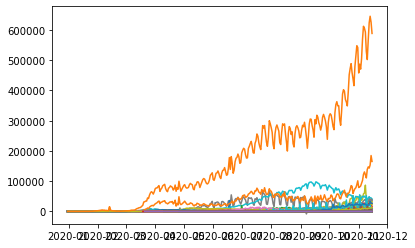

In [42]:
for x in csv_df['location'].unique():
    xAxis = csv_df['date'].loc[csv_df['location'] == x]
    xAxis=pd.to_datetime(xAxis) # converting dates to DataTime    plt.plot(xAxis, csv_df[Total].loc[csv_df['location'] == x].fillna(0))
    
    plt.plot(xAxis, csv_df["new_cases"].loc[csv_df['location'] == x].fillna(0))
    
plt.show()